In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import warnings
from pandas.api.types import CategoricalDtype
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Exercises

The end result of this exercise should be a Jupyter notebook named `model`.

Using [saas.csv](https://ds.codeup.com/saas.csv) or log data from API usage or store_item_sales

1. Split data (train/test) and resample by any period, except daily, and aggregate using the sum. 


In [82]:
saas = pd.read_csv('data/saas.csv',infer_datetime_format=True)
saas.columns = saas.columns.str.lower()
saas = saas[saas.subscription_type > 0]
saas.subscription_type = saas.subscription_type.astype('uint8')
saas.month_invoiced = pd.to_datetime(saas.month_invoiced)
saas = saas.drop(columns=['unnamed: 0'])
saas.head()

,month_invoiced,customer_id,invoice_id,subscription_type,amount
1,2014-01-31,1000001,5000001,2,10.0
4,2014-01-31,1000004,5000004,1,5.0
5,2014-01-31,1000005,5000005,2,10.0
13,2014-01-31,1000013,5000013,1,5.0
14,2014-01-31,1000014,5000014,4,20.0


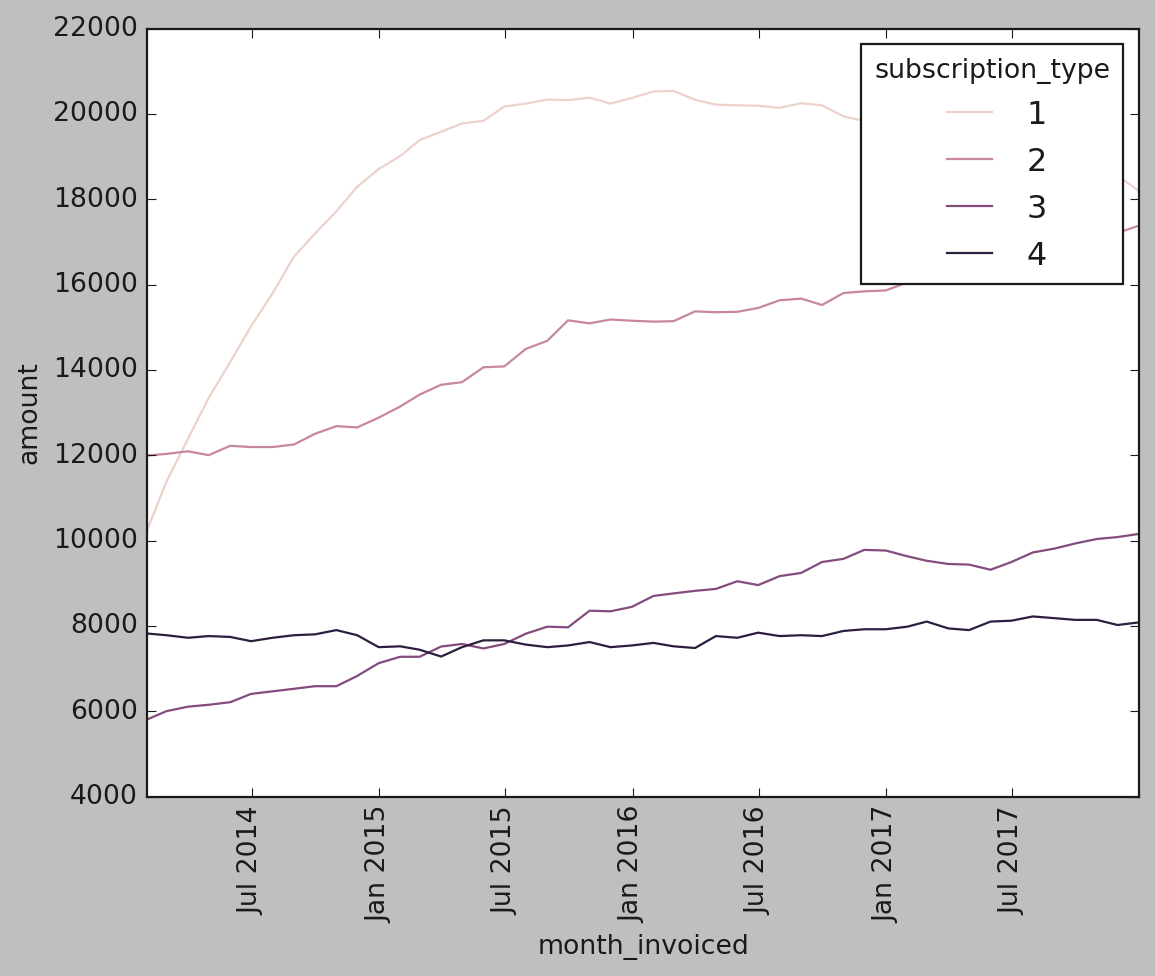

In [83]:
resaas = saas.groupby(['month_invoiced','subscription_type']).sum()
sns.lineplot(data=resaas,x='month_invoiced',y='amount',hue='subscription_type')
plt.xticks(rotation=90)
plt.show()

In [92]:
train_end = int(round(resaas.shape[0] * .7))
train = resaas[:train_end]
test = resaas[train_end:]

2. Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:
    - Simple Average
    - Moving Average
    - Holt's Linear Trend Model
    - Based on previous year/month/etc., this is up to you.



In [ ]:
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

Optional: Using store item demand

1. Predict 2018 total **monthly** sales for a single store and/or item by creating a model using prophet.
2. Return a dataframe with the month, store_id, y-hat, and the confidence intervals (y-hat lower, y-hat upper).
3. Plot the 2018 monthly sales predictions.